<a href="https://colab.research.google.com/github/magesh73/Restnet50Dataset/blob/master/AutoPilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


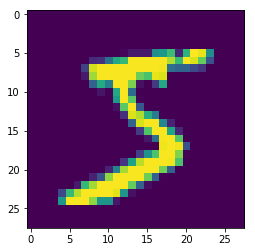

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
from keras.layers import Activation, BatchNormalization
model = Sequential()

k=17
f=8
maxf =32
input=28

while (f < maxf):
  model = Sequential()
  model.add(Convolution2D(f, k, k, activation='relu', input_shape=(28,28,1)))
  #model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
  model.add( BatchNormalization())
  model.add(Convolution2D(10, 1, activation='relu'))
  model.add( BatchNormalization())

  model.add(Convolution2D(10, input-k+1))
  model.add( BatchNormalization())
  #model.add(Convolution2D(10, 26))

  model.add(Flatten())
  model.add(Activation('softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
  model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Score-->', score)
  #increase the kernel size
  #k=k+2
  #increasse the filter count
  f= f+1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (17, 17), activation="relu", input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 12, 12, 8)         2320      
_________________________________________________________________
batch_normalization_25 (Batc (None, 12, 12, 8)         32        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 10)        90        
_________________________________________________________________
batch_normalization_26 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 1, 1, 10)          14410     
_________________________________________________________________
batch_normalization_27 (Batc (None, 1, 1, 10)          40        
_________________________________________________________________
flatten_9 (Flatten)          (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.4260 - acc: 0.9172
Epoch 2/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.2086 - acc: 0.9532
Epoch 3/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.1560 - acc: 0.9621
Epoch 4/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.1292 - acc: 0.9673
Epoch 5/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.1099 - acc: 0.9717
Epoch 6/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0968 - acc: 0.9741
Epoch 7/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0874 - acc: 0.9761
Epoch 8/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0829 - acc: 0.9767
Epoch 9/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0750 - acc: 0.9790
Epoch 10/10
60000/60000 [==============================] - 11s 175us/step - loss: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(9, (17, 17), activation="relu", input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 12, 12, 9)         2610      
_________________________________________________________________
batch_normalization_28 (Batc (None, 12, 12, 9)         36        
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 10)        100       
_________________________________________________________________
batch_normalization_29 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 1, 1, 10)          14410     
_________________________________________________________________
batch_normalization_30 (Batc (None, 1, 1, 10)          40        
_________________________________________________________________
flatten_10 (Flatten)         (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (17, 17), activation="relu", input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 12, 12, 10)        2900      
_________________________________________________________________
batch_normalization_31 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 12, 10)        110       
_________________________________________________________________
batch_normalization_32 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 1, 1, 10)          14410     
_________________________________________________________________
batch_normalization_33 (Batc (None, 1, 1, 10)          40        
_________________________________________________________________
flatten_11 (Flatten)         (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(11, (17, 17), activation="relu", input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 12, 12, 11)        3190      
_________________________________________________________________
batch_normalization_34 (Batc (None, 12, 12, 11)        44        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 10)        120       
_________________________________________________________________
batch_normalization_35 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 1, 1, 10)          14410     
_________________________________________________________________
batch_normalization_36 (Batc (None, 1, 1, 10)          40        
_________________________________________________________________
flatten_12 (Flatten)         (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (17, 17), activation="relu", input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 12, 12, 12)        3480      
_________________________________________________________________
batch_normalization_37 (Batc (None, 12, 12, 12)        48        
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 12, 12, 10)        130       
_________________________________________________________________
batch_normalization_38 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 1, 1, 10)          14410     
_________________________________________________________________
batch_normalization_39 (Batc (None, 1, 1, 10)          40        
_________________________________________________________________
flatten_13 (Flatten)         (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (17, 17), activation="relu", input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 12, 12, 13)        3770      
_________________________________________________________________
batch_normalization_40 (Batc (None, 12, 12, 13)        52        
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 12, 12, 10)        140       
_________________________________________________________________
batch_normalization_41 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 1, 1, 10)          14410     
_________________________________________________________________
batch_normalization_42 (Batc (None, 1, 1, 10)          40        
_________________________________________________________________
flatten_14 (Flatten)         (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (17, 17), activation="relu", input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 12, 12, 14)        4060      
_________________________________________________________________
batch_normalization_43 (Batc (None, 12, 12, 14)        56        
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 12, 12, 10)        150       
_________________________________________________________________
batch_normalization_44 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 1, 1, 10)          14410     
_________________________________________________________________
batch_normalization_45 (Batc (None, 1, 1, 10)          40        
_________________________________________________________________
flatten_15 (Flatten)         (None, 10)                0         
__________

KeyboardInterrupt: ignored

In [0]:
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()